***
# **<font color=darkblue size=10>Data Science Project</font>**
***

## **Descriptive Analysis of a Dataset**

Using the knowledge acquired during the data science classes, we will perform a basic descriptive analysis of a dataset of international matches during the years 1876 to 2022. 

We will build graphs, calculate and evaluate measures of central tendency, separator measures and data dispersion.

# **Dependencies**

The pandas, numpy, seaborn and matplotlib libraries were used for data analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# **Deafult Settings**

Some general settings used on the notebook

In [2]:
# Set aspects of the visual theme for all matplotlib and seaborn plots.
sns.set()

In [3]:
%%html
<style>
table {float:left}
</style>

# **<font color=darkblue>PROJECT DATASET</font>**
***

### **International football results from 1872 to 2022**

This dataset includes 44,341 results of international football matches starting from the very first official match in 1872 up to 2022. The matches range from FIFA World Cup to FIFI Wild Cup to regular friendly matches. The matches are strictly men's full internationals and the data does not include Olympic Games or matches where at least one of the teams was the nation's B-team, U-23 or a league select team.

### **Variables used**

#### results.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|home_score|full-time home team score including extra time, not including penalty-shootouts|
|away_score|full-time away team score including extra time, not including penalty-shootouts|
|tournament|the name of the tournament|
|city|the name of the city/town/administrative unit where the match was played|
|country|the name of the country where the match was played|
|neutral|TRUE/FALSE column indicating whether the match was played at a neutral venue|

#### shootouts.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|winner|winner of the penalty-shootout|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|date|date of the match|
|home_team|the name of the home_team|
|away_team|the name of the away_team|
|team|name of the team scoring the goal|
|scorer|name of the player scoring the goal|
|own_goal|whether the goal was an own-goal|
|penalty|whether the goal was a penalty|

### **Variables created bellow**

#### results.csv

|Variable|Description|
|:---|:---|
|goal_dif|difference between home_score and away_score|
|year|year of the game|

#### goalscorers.csv

|Variable|Description|
|:---|:---|
|year|year of the match|

# **Loading Dataset Files**

This dataset is made up of three csv files and their descriptions are provided below.

* goalscorers: goals scored and details about them
* shootouts: resultsof penalty shootouts
* results: results of international matches.

In [4]:
goalscorers = pd.read_csv('data/goalscorers.csv')
shootouts = pd.read_csv('data/shootouts.csv')
results = pd.read_csv('data/results.csv')

# **Process Datasets**

## results.csv

In [5]:
# Create a goal_dif column
results['goal_dif'] = results['home_score'] - results['away_score']
# Change type of date column to datetime
results['date'] = pd.to_datetime(results.date)
# Add column year
results['year'] = results.date.map(lambda x: x.year)
results.head(15)

date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   
5  1876-03-25  Scotland     Wales           4           0   Friendly  Glasgow   
6  1877-03-03   England  Scotland           1           3   Friendly   London   
7  1877-03-05     Wales  Scotland           0           2   Friendly  Wrexham   
8  1878-03-02  Scotland   England           7           2   Friendly  Glasgow   
9  1878-03-23  Scotland     Wales           9           0   Friendly  Glasgow   
10 1879-01-18   England     Wales           2           1   Friendly   London   
11 1879-04-05   England  Scotland           5           4   Friendly   London   
12 1879-04-07     Wales  Scotland           0           3   Friendly  Wrexham   
13 1880-03-13  Scotland   England           5           4   Friendly  Glasgow   
14 1880-03-15     Wales   England           2           3   Friendly  Wrexham   

     country  neutral  goal_dif  year  
0   Scotland    False         0  1872  
1    England    False         2  1873  
2   Scotland    False         1  1874  
3    England    False         0  1875  
4   Scotland    False         3  1876  
5   Scotland    False         4  1876  
6    England    False        -2  1877  
7      Wales    False        -2  1877  
8   Scotland    False         5  1878  
9   Scotland    False         9  1878  
10   England    False         1  1879  
11   England    False         1  1879  
12     Wales    False        -3  1879  
13  Scotland    False         1  1880  
14     Wales    False        -1  1880

## goalscores.csv

In [6]:
# Change type of date column to datetime
goalscorers['date'] = pd.to_datetime(goalscorers.date)
# Add column year
goalscorers['year'] = goalscorers.date.map(lambda x: x.year)
goalscorers.head(5)

date  home_team away_team       team            scorer  minute  \
0 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2 1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3 1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4 1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  year  
0     False    False  1916  
1     False    False  1916  
2     False    False  1916  
3     False    False  1916  
4     False    False  1916

# **Descriptive Variables Analysis**

## **results dataset**

### **Measures of Central Tendency**

#### **Mean**

In [7]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].mean().to_frame().T

year  home_score  away_score  goal_dif   neutral
0  1992.095787    1.739278    1.178401  0.560877  0.248603

#### **Median**

In [8]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].median().to_frame().T

year  home_score  away_score  goal_dif  neutral
0  1999.0         1.0         1.0       0.0      0.0

#### **Mode**

In [9]:
cols = ['year', 'home_team', 'away_team', 'home_score', 'away_score', 'goal_dif', 'tournament', 'city', 'country', 'neutral']
results[cols].mode()

year home_team away_team  home_score  away_score  goal_dif tournament  \
0  2019    Brazil   Uruguay           1           0         0   Friendly   

           city        country  neutral  
0  Kuala Lumpur  United States    False

### **Dispersion Measures**

#### **Standard Deviation**

In [10]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].std().to_frame().T

year  home_score  away_score  goal_dif   neutral
0  24.62302    1.747263    1.393775  2.381203  0.432208

#### **Variance**

In [11]:
cols = ['year', 'home_score', 'away_score', 'goal_dif', 'neutral']
results[cols].var().to_frame().T

year  home_score  away_score  goal_dif   neutral
0  606.293096    3.052926    1.942609  5.670126  0.186804

### **Boxplots**

**Observação:** Nos gráficos que analisam as variáves `home_score`, `away_score` e `goal_dif`, os valores cujo módulo fosse acima de 8 foram simplificados para facilitar a comparação

#### **year**

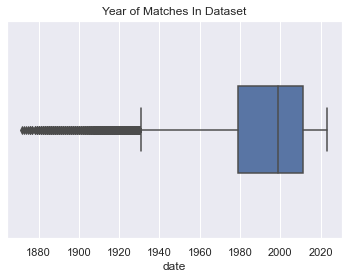

In [12]:
# Visualization Settings
ax = sns.boxplot(data=results, x=results.date.map(lambda x: x.year), width=0.4, orient='h')
ax.set_title("Year of Matches In Dataset")


# Show
plt.show()

#### **home_score and away_score**

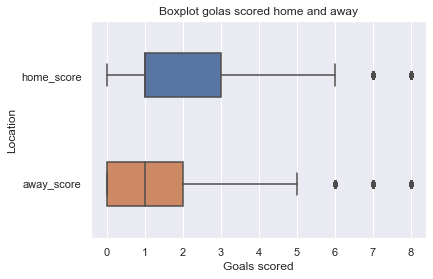

In [13]:
# Create copy of results DataFrame
match_score = results[['home_score', 'away_score', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 8 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_home = match_score.home_score > max_number_of_goals
mask_number_of_goals_away = match_score.away_score > max_number_of_goals

match_score.home_score = match_score.home_score.where(~mask_number_of_goals_home, max_number_of_goals)
match_score.away_score = match_score.away_score.where(~mask_number_of_goals_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score[['home_score', 'away_score']][mask_field],
            width=0.4, orient='h')
ax.set_ylabel("Location")
ax.set_xlabel("Goals scored")
ax.set_title("Boxplot golas scored home and away")

# Show
plt.show()

#### **goal_dif**

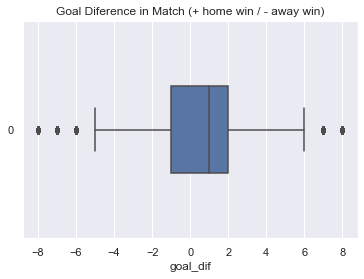

In [14]:
# Create copy of results DataFrame
match_score = results[['goal_dif', 'neutral']].copy()

# Remove matches in neutral field for comparation
mask_field = match_score.neutral == False

# Simplifying the number of goals above 7 to facilitate visualization (Generate Warning, but is fine)
max_number_of_goals = 8
mask_number_of_goals_dif_home = match_score.goal_dif > max_number_of_goals
mask_number_of_goals_dif_away = match_score.goal_dif < -max_number_of_goals

match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_home, max_number_of_goals)
match_score.goal_dif = match_score.goal_dif.where(~mask_number_of_goals_dif_away, max_number_of_goals)

# Visualization
ax = sns.boxplot(data=match_score['goal_dif'][mask_field],
            width=0.4, orient='h')
ax.set_xlabel("goal_dif")
ax.set_title("Goal Diference in Match (+ home win / - away win)")

# Show
plt.show()

## **goalscores dataset**

### **Measures of Central Tendency**

#### **Mean**

In [15]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].mean().to_frame().T

minute  own_goal   penalty
0  50.019166  0.017509  0.065475

#### **Median**

In [16]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].median().to_frame().T

minute  own_goal  penalty
0    51.0       0.0      0.0

#### **Mode**

In [17]:
cols = ['home_team', 'away_team', 'team', 'scorer', 'minute', 'own_goal', 'penalty']
goalscorers[cols].mode()

home_team away_team    team             scorer  minute  own_goal  penalty
0    Brazil   Uruguay  Brazil  Cristiano Ronaldo    90.0     False    False

### **Dispersion Measures**

#### **Standard Deviation**

In [18]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].std().to_frame().T

minute  own_goal   penalty
0  26.360859  0.131159  0.247365

#### **Variance**

In [19]:
cols = ['minute', 'own_goal', 'penalty']
goalscorers[cols].var().to_frame().T

minute  own_goal  penalty
0  694.894894  0.017203  0.06119

### **Boxplots**

#### **minute**

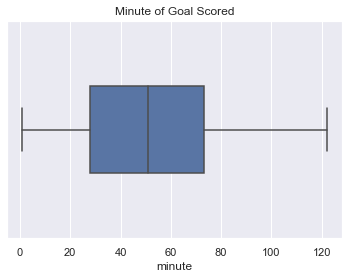

In [20]:
# Visualização
ax = sns.boxplot(data=goalscorers, x='minute', width=0.4, orient='h')
ax.set_title("Minute of Goal Scored")


# Show
plt.show()

## **shootouts dataset**

### **Measures of Central Tendency**

#### **Mean**

As this dataframe does not have numerical values, it isn't possible to calculate the average.

#### **Median**

As this dataframe does not have numerical values, it isn't possible to calculate the median.

#### **Mode**

In [21]:
shootouts[['home_team', 'away_team', 'winner']].mode()

home_team away_team     winner
0  South Africa    Uganda  Argentina
1        Zambia       NaN        NaN

### **Dispersion Measures**

#### **Standard Deviation**

As this dataframe does not have numerical values, it isn't possible to calculate the standard deviation.

#### **Variance**

As this dataframe does not have numerical values, it isn't possible to calculate the variance.

### **Boxplots**

#### **winner_count**

Checks the absolute frequency of penalty shootout wins by team

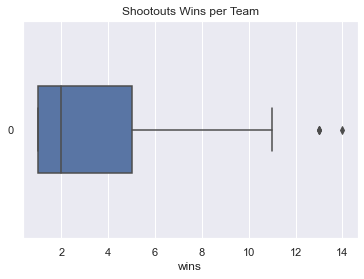

In [22]:
# Visualization
ax = sns.boxplot(data=shootouts.winner.value_counts(), width=0.4, orient='h')
ax.set_title("Shootouts Wins per Team")
ax.set_xlabel('wins')

# Show
plt.show()

# **Bonus - Elo Ranking**

The World Football Elo Ratings are based on the Elo rating system. This system is used by FIDE, the international chess federation, to rate chess players.

We can apply the Elo rating system to international football, by adding a weighting for the kind of match, an adjustment for the home team advantage, and an adjustment for goal difference in the match result.

The ratings are based on the following formulas:

Rn = Ro + G x K × (W - We)

- Rn is the new rating, Ro is the old (pre-match) rating.
- G is a goal difference index
    - If 0 or 1: 1
    - If 2: 3/2
    - If 3 or more: (11 + goal_dif) / 8
- K is the weight constant for the tournament played (We made an adjustmant from the reference):
    - 60 for World Cup Matches;
    - 50 for continental championships and major intercontinental tournaments;
    - 40 for World Cup qualifiers and major tournaments;
    - 30 for Continental qualifiers and major tournaments;
    - 20 for Friendly and other tournaments
- W is the result of the game (1 for a win, 0.5 for a draw, and 0 for a loss).
- We is the expected result (win expectancy), either from the chart or the following formula:
    - We = 1 / (10**(-dr/400) + 1)
    - dr equals the difference in ratings plus 100 points for a team playing at home.
    
Reference: https://www.eloratings.net/about

## **Functions implementation**

In [23]:
# Return expected result probabilty
def expected_result(ranking_a, ranking_b, home_advantage):
    return 1 / (10**(-((ranking_a+home_advantage)-ranking_b)/400) + 1)

# Return result by goal diference
def result(goal_dif):
    # return 0 to lost
    if goal_dif < 0:
        return 0
    # return 0.5 to draw
    elif goal_dif == 0:
        return 0.5
    # return 1 to win
    return 1


# The number of goals is taken into account by use of a goal difference index
def goal_index(goal_dif):
    goal_dif = abs(goal_dif)
    if goal_dif <= 1:
        return 1
    elif goal_dif == 2:
        return 3/2
    else:
        return (11 + goal_dif) / 8


# Return tournament weight constant
def tournament_weight(tournament):
    # 60 points
    world_cup = 'FIFA World Cup'
    # 50 points
    continental = ['AFC Asian Cup', 'Africa Cup of Nations',
                  'CONCACAF Gold Cup', 'Copa América', 'OFC Nations Cup',
                  'UEFA European Championship', 'CONCACAF Cup', 'AFC Solidarity Cup',
                  'AFC Challenge Cup', 'Confederations Cup', 'CONMEBOL–UEFA Cup of Champions']
    # 40 points
    international_qualifiers_and_majors = ['UEFA Nations League', 'FIFA World Cup qualification',  
                                           'CONCACAF Nations League', 'African Nations Championship']
    # 30 points
    continental_qualifiers = ['UEFA Euro qualification', 'African Cup of Nations qualification', 'AFC Asian Cup qualification',
                              'Copa América qualification']
    # 20 points + others
    friendly = 'Friendly'
    
    if tournament == world_cup:
        return 60
    elif tournament in continental:
        return 50
    elif tournament in international_qualifiers_and_majors:
        return 40
    elif tournament in continental_qualifiers:
        return 30
    elif tournament == friendly:
        return 20
    else:
        return 20


# Calculate change of points
def points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100):
    g = goal_index(goal_dif)
    k = tournament_weight(tournament)
    w = result(goal_dif)
    we = expected_result(ranking_a, ranking_b, home_advantage)
    return g * k * (w - we)


# Return the new ranking of the team
def elo(ranking_a, ranking_b, goal_dif, tournament, neutral, home=True):
    if neutral and home:
        return ranking_a + points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    elif neutral and not home:
        return ranking_b - points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=0)
    elif home:
        return ranking_a + points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)
    return ranking_b - points_change(ranking_a, ranking_b, goal_dif, tournament, home_advantage=100)

## **Data Processing**

In [24]:
# Assigning default rating of 1500 to each team
unique_team_list = np.unique(pd.concat([results.home_team, results.away_team], ignore_index=True))
rating_dict = {team:1500 for team in unique_team_list}
# Assign each year of dataset
year_list = results.year.unique()
year_dict = dict()

# Itarate years to calculate elo ranking
for year in year_list:
    # Select mask with year of the iteration
    mask = results['year'] == year
    results_temp = results[mask][['home_team', 'away_team', 'goal_dif', 'tournament', 'neutral']]
    
    # Iterate dataframe to calculate elo ranking changes
    for index, row in results_temp.iterrows():
        
        # Get home and away teams names
        home_team = row.home_team
        away_team = row.away_team
        
        # Get other informations
        goal_dif = row.goal_dif
        tournament = row.tournament
        neutral = row.neutral
        
        # Get home and away teams scores
        home_team_score = rating_dict[home_team]
        away_team_score = rating_dict[away_team]
        
        # Calculate new scores according to result of the match
        home_team_score = elo(home_team_score, away_team_score, goal_dif, tournament, neutral, home=True)
        away_team_score = elo(home_team_score, away_team_score, goal_dif, tournament, neutral, home=False)
        
        # Assign new scores
        rating_dict[home_team] = home_team_score
        rating_dict[away_team] = away_team_score

    # Transform rating_dict into DataFrame
    year_dict[year] = rating_dict.copy()

country_ranking = pd.DataFrame.from_dict(year_dict)
country_ranking = country_ranking.reset_index().rename(columns={'index': 'country'})
country_ranking

country    1872    1873    1874    1875    1876    1877    1878  \
0         Abkhazia  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
1      Afghanistan  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
2          Albania  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
3         Alderney  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
4          Algeria  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
..             ...     ...     ...     ...     ...     ...     ...     ...   
311     Yugoslavia  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
312         Zambia  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
313       Zanzibar  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
314       Zimbabwe  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   
315  Åland Islands  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0  1500.0   

       1879    1880  ...         2014         2015         2016         2017  \
0    1500.0  1500.0  ...  1495.795646  1495.795646  1541.851957  1537.114724   
1    1500.0  1500.0  ...  1297.171850  1322.079335  1326.033712  1334.662828   
2    1500.0  1500.0  ...  1611.563089  1632.313054  1599.557607  1623.529074   
3    1500.0  1500.0  ...  1401.560612  1359.478499  1359.478499  1347.580703   
4    1500.0  1500.0  ...  1747.113271  1748.196510  1722.458934  1667.296094   
..      ...     ...  ...          ...          ...          ...          ...   
311  1500.0  1500.0  ...  1817.907847  1817.907847  1817.907847  1817.907847   
312  1500.0  1500.0  ...  1616.508650  1609.476480  1605.095052  1663.795333   
313  1500.0  1500.0  ...  1445.533117  1445.347718  1445.347718  1484.132374   
314  1500.0  1500.0  ...  1587.517923  1585.829667  1592.148412  1596.689152   
315  1500.0  1500.0  ...  1503.684512  1479.874305  1479.874305  1506.693949   

            2018         2019         2020         2021         2022  \
0    1573.851851  1590.416934  1590.416934  1590.416934  1590.416934   
1    1327.902339  1323.648908  1323.648908  1327.496183  1292.290165   
2    1539.358011  1554.754631  1578.002721  1608.412824  1571.702703   
3    1347.580703  1340.406325  1340.406325  1340.406325  1340.406325   
4    1628.919370  1753.821646  1768.790654  1829.319128  1806.916842   
..           ...          ...          ...          ...          ...   
311  1817.907847  1817.907847  1817.907847  1817.907847  1817.907847   
312  1623.435750  1604.691480  1610.550506  1572.171643  1553.722341   
313  1484.132374  1484.132374  1484.132374  1484.132374  1484.132374   
314  1593.629156  1579.179292  1578.597280  1483.718254  1480.573448   
315  1506.693949  1506.693949  1506.693949  1506.693949  1506.693949   

            2023  
0    1590.416934  
1    1292.290165  
2    1568.422788  
3    1340.406325  
4    1810.859116  
..           ...  
311  1817.907847  
312  1571.641021  
313  1484.132374  
314  1480.573448  
315  1506.693949  

[316 rows x 153 columns]

## **All-time Top 15**

In [25]:
country_ranking.sort_values(by=2023, ascending=False).head(15)[['country', 2023]]

country         2023
12     Argentina  2186.924318
38        Brazil  2169.166898
96        France  2150.595142
187  Netherlands  2101.447424
216     Portugal  2055.183608
85       England  2029.930334
28       Belgium  2018.915076
259        Spain  2018.495179
69       Croatia  2004.834604
104      Germany  1989.726241
293      Uruguay  1976.729413
61      Colombia  1967.961666
134        Italy  1959.891510
182      Morocco  1959.313904
265  Switzerland  1933.229967

## **All-time Worst 15**

In [26]:
country_ranking.sort_values(by=2023, ascending=False).tail(15)[['country', 2023]]

country         2023
205                      Pakistan  1081.964971
253                       Somalia  1075.431554
78                       Djibouti  1049.315494
113                          Guam  1044.213977
155                 Liechtenstein  1026.694729
149                          Laos  1022.173833
158                         Macau  1015.089436
292  United States Virgin Islands  1011.592970
39         British Virgin Islands  1003.389976
41                         Brunei   992.803898
9                        Anguilla   981.502038
260                     Sri Lanka   978.117739
277                   Timor-Leste   951.968625
32                         Bhutan   927.374965
238                    San Marino   871.085715

## **Boxplot Visualization**

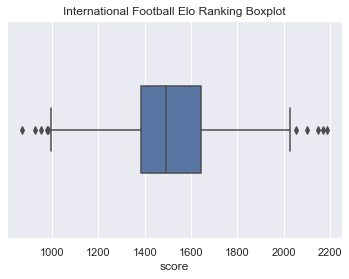

In [27]:
# Visualization
ax = sns.boxplot(data=country_ranking, x=2023, width=0.4, orient='h')
ax.set_title("International Football Elo Ranking Boxplot")
ax.set_xlabel('score')

# Show
plt.show()